# Exercise 6.5: Unsupervised Machine Learning

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [25]:
# Define path

path = r'C:\Users\ryanc\OneDrive\Documents\Data Analytics Exercises\Achievement 6'

In [4]:
#Import df
delay = pd.read_csv(os.path.join(path, 'delay seperated_excel.csv'), index_col = False)

In [5]:
#Change settings to view max rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
delay.shape

(3343, 24)

In [7]:
delay.head()

,Column1,year,month,carrier,carrier_name,airport,city,state,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,0,2020,12,9E,Endeavor Air Inc.,ABE,Allentown/Bethlehem/Easton,Pennsylvania,Lehigh Valley International,44,3,1.63,0.0,0.12,0.0,1.25,0,1,89,56,0,3,0,30
1,1,2020,12,9E,Endeavor Air Inc.,ABY,Albany,Georgia,Southwest Georgia Regional,90,1,0.96,0.0,0.04,0.0,0.00,0,0,23,22,0,1,0,0
2,2,2020,12,9E,Endeavor Air Inc.,AEX,Alexandria,Louisiana,Alexandria International,88,8,5.75,0.0,1.60,0.0,0.65,0,1,338,265,0,45,0,28
3,3,2020,12,9E,Endeavor Air Inc.,AGS,Augusta,Georgia,Augusta Regional at Bush Field,184,9,4.17,0.0,1.83,0.0,3.00,0,0,508,192,0,92,0,224
4,4,2020,12,9E,Endeavor Air Inc.,ALB,Albany,New York,Albany International,76,11,4.78,0.0,5.22,0.0,1.00,1,0,692,398,0,178,0,116


In [8]:
#Drop Column1

delay = delay.drop(columns = 'Column1')

In [9]:
#Check column was dropped

delay.head()

,year,month,carrier,carrier_name,airport,city,state,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2020,12,9E,Endeavor Air Inc.,ABE,Allentown/Bethlehem/Easton,Pennsylvania,Lehigh Valley International,44,3,1.63,0.0,0.12,0.0,1.25,0,1,89,56,0,3,0,30
1,2020,12,9E,Endeavor Air Inc.,ABY,Albany,Georgia,Southwest Georgia Regional,90,1,0.96,0.0,0.04,0.0,0.00,0,0,23,22,0,1,0,0
2,2020,12,9E,Endeavor Air Inc.,AEX,Alexandria,Louisiana,Alexandria International,88,8,5.75,0.0,1.60,0.0,0.65,0,1,338,265,0,45,0,28
3,2020,12,9E,Endeavor Air Inc.,AGS,Augusta,Georgia,Augusta Regional at Bush Field,184,9,4.17,0.0,1.83,0.0,3.00,0,0,508,192,0,92,0,224
4,2020,12,9E,Endeavor Air Inc.,ALB,Albany,New York,Albany International,76,11,4.78,0.0,5.22,0.0,1.00,1,0,692,398,0,178,0,116


### 2. The elbow technique

In [10]:
# Create a subset of the data

sub = delay[['arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct','nas_ct','security_ct', 'late_aircraft_ct',
             'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 
             'security_delay', 'late_aircraft_delay']]

In [11]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [12]:
# Create a score that represents a rate of variation for the given cluster option.

score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))] 

score

C:\Users\ryanc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ryanc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ryanc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ryanc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-488364030196.08344,
 -168207423403.09714,
 -94030287335.44298,
 -65855051555.782,
 -46559528482.075745,
 -37979736069.57411,
 -32633211007.652775,
 -28272627375.990875,
 -25496218186.029385]

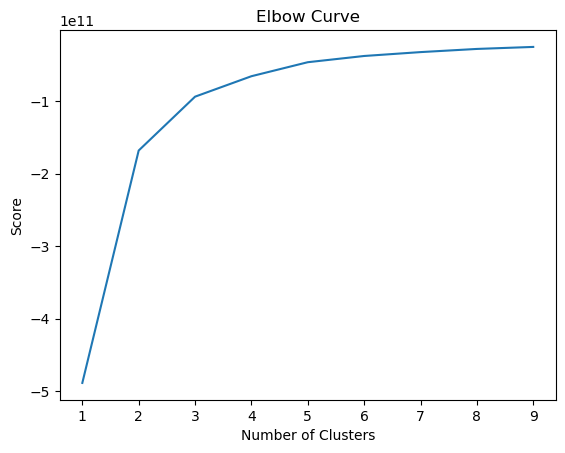

In [34]:
# Plot the elbow curve using PyLab.

elbow = pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
plt.savefig(os.path.join(path, 'elbow curve.png'))
plt.show()

## Question 4: 
##### Explain why you chose the number of clusters you did
I will be choosing 3 clusters as after that point on the graph the score does not increase dramatically. TO be sure of my decision I created data with both 4 and 5 clusters and there were only 7 to 8 data points in clusters 4 and 5, which is not enough data to be significant. 

### 3. k-means clustering

In [14]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [15]:
# Fit the k-means object to the data.

kmeans.fit(sub)

C:\Users\ryanc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [16]:
sub['clusters'] = kmeans.fit_predict(sub)

C:\Users\ryanc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ryanc\AppData\Local\Temp\ipykernel_18936\3683309691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [17]:
# Check cluster column has been added

sub.head(10)

,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,clusters
0,44,3,1.63,0.00,0.12,0.0,1.25,0,1,89,56,0,3,0,30,0
1,90,1,0.96,0.00,0.04,0.0,0.00,0,0,23,22,0,1,0,0,0
2,88,8,5.75,0.00,1.60,0.0,0.65,0,1,338,265,0,45,0,28,0
3,184,9,4.17,0.00,1.83,0.0,3.00,0,0,508,192,0,92,0,224,0
4,76,11,4.78,0.00,5.22,0.0,1.00,1,0,692,398,0,178,0,116,0
5,5985,445,142.89,11.96,161.37,1.0,127.79,5,0,30756,16390,1509,5060,16,7781,2
6,142,14,5.36,0.00,7.70,0.0,0.94,1,0,436,162,0,182,0,92,0
7,147,10,6.04,1.00,1.00,0.0,1.96,0,1,1070,838,141,24,0,67,0
8,84,14,6.24,0.96,6.80,0.0,0.00,1,1,2006,1164,619,223,0,0,0
9,150,19,5.70,0.00,12.07,0.0,1.23,3,0,846,423,0,389,0,34,0


In [18]:
sub['clusters'].value_counts()

clusters
0    3222
2     101
1      20
Name: count, dtype: int64

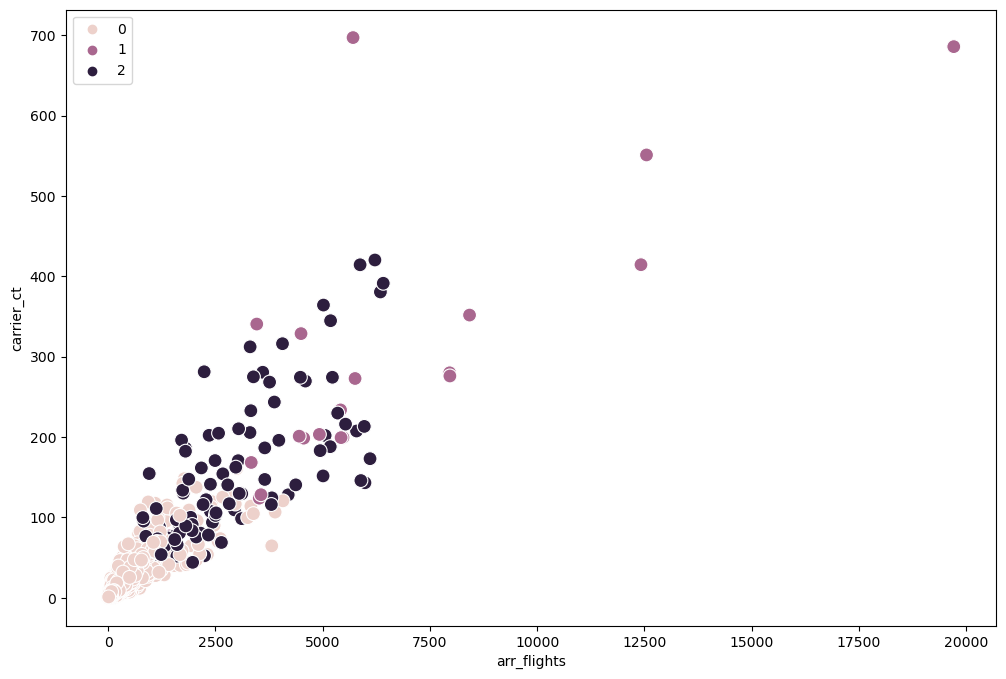

In [35]:
# Plot the clusters for the "arr_flights" and "carrier_ct" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['arr_flights'], y=sub['carrier_ct'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('arr_flights') 
plt.ylabel('carrier_ct')
plt.savefig(os.path.join(path, 'cluster1.png'))
plt.show()

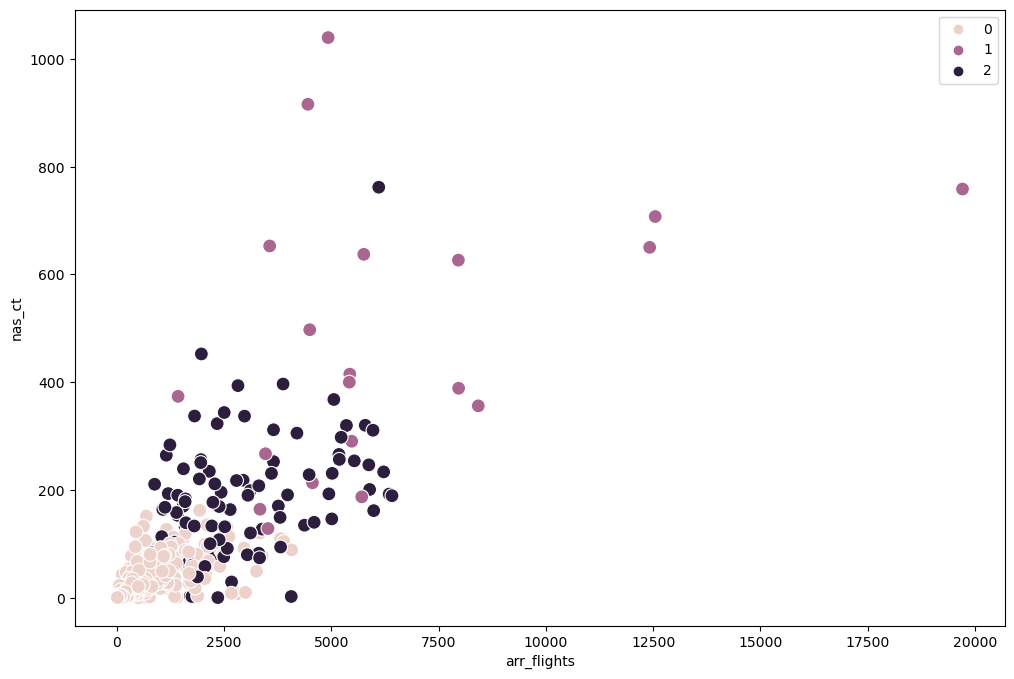

In [36]:
# Plot the clusters for the "arr_flights" and "nas_ct" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['arr_flights'], y=sub['nas_ct'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('arr_flights') 
plt.ylabel('nas_ct')
plt.savefig(os.path.join(path, 'cluster2.png'))
plt.show()

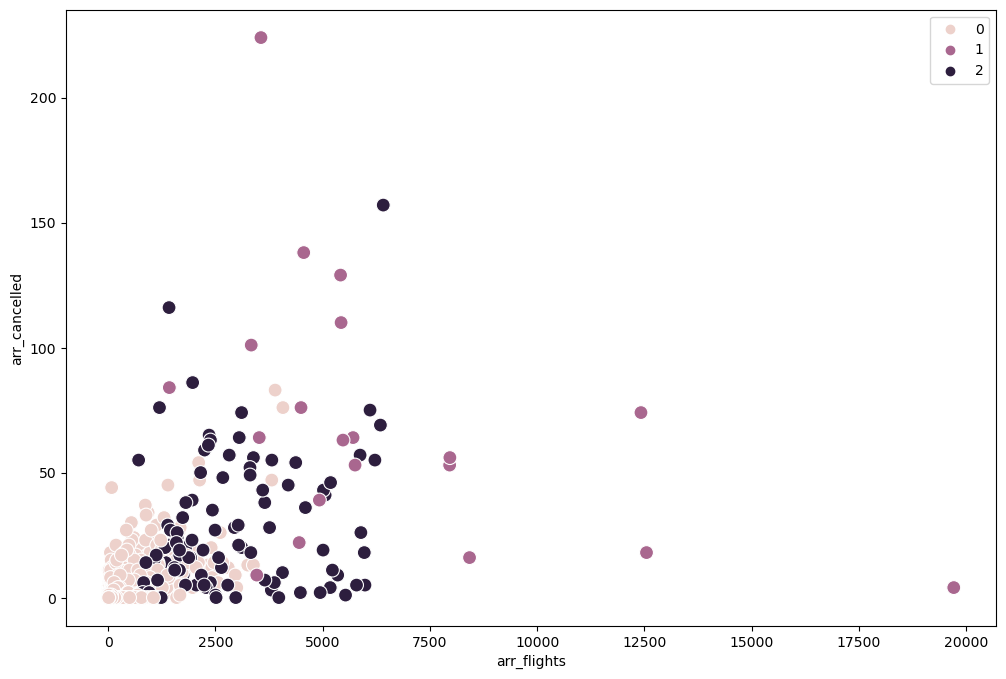

In [37]:
# Plot the clusters for the "arr_flights" and "arr_cancelled" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['arr_flights'], y=sub['arr_cancelled'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('arr_flights') 
plt.ylabel('arr_cancelled')
plt.savefig(os.path.join(path, 'cluster3.png'))
plt.show()

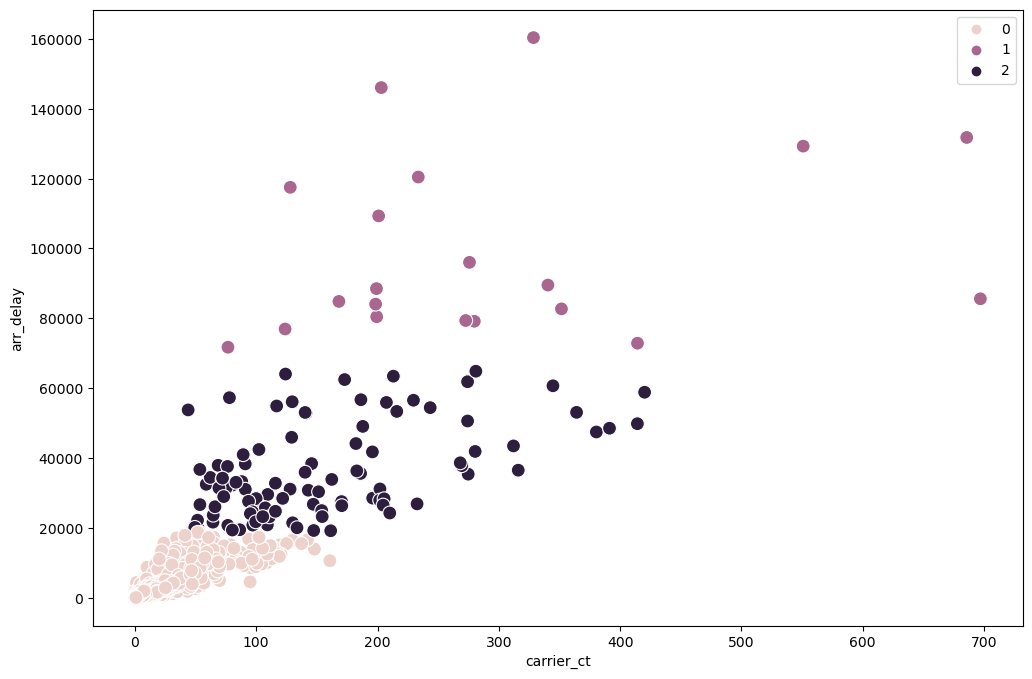

In [38]:
# Plot the clusters for the "carrier_ct" and "arr_delay" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['carrier_ct'], y=sub['arr_delay'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('carrier_ct') 
plt.ylabel('arr_delay')
plt.savefig(os.path.join(path, 'cluster4.png'))
plt.show()

## Question 8:
#### Discuss how and why the clusters make sense. If they don’t make sense, however, this is also useful insight, as it means you’ll need to explore the data further
In general, cluster 0, the pink dots are grouped by low arrivals and/or low delays. Cluster 2, the dark purple points, are arranged by medium arrivals and/or medium delay counts and times. Cluster 1, the purple data points, are grouped by medium to high arrivals but only high delays. This clustering helps us to see the hypothesis, "An increase in arriving flights leads to an increase in delays". As we've seen from all our previous charts and supervised machine learning, the hypothesis begins to fall apart when the number of arriving flights is high. At low levels of arriving flights, or even in the last chart above, at low levels of carrier_ct delays, there are low levels of delays. However, when arriving flights reach past 1000-2000, the data begins to spread out and the clusters overlap. Higher numbers of arriving flights are better correlated with carrier delays then any other form of delay based on all of our modeling so far. We also see that arriving flights does not correlate well with an increase of cancellations as soon above. 

In [23]:
sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark purple'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\ryanc\AppData\Local\Temp\ipykernel_18936\749661046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark purple'


In [24]:
sub.groupby('cluster').agg({'arr_flights':['mean', 'median'], 
                         'arr_del15':['mean', 'median'], 
                         'carrier_ct':['mean', 'median'],
                          'weather_ct':['mean', 'median'],
                            'nas_ct':['mean', 'median'],
                            'security_ct':['mean', 'median'],
                            'late_aircraft_ct':['mean', 'median'],
                            'arr_cancelled':['mean', 'median'],
                            'arr_diverted':['mean', 'median'],
                            'arr_delay':['mean', 'median'],
                            'carrier_delay':['mean', 'median'],
                            'weather_delay':['mean', 'median'],
                            'nas_delay':['mean', 'median'],
                            'security_delay':['mean', 'median'],
                            'late_aircraft_delay':['mean', 'median']})

arr_flights            arr_del15          carrier_ct           \
                    mean  median         mean  median        mean   median   
cluster                                                                      
dark purple  2893.871287  2428.0   544.762376   471.0  153.898317  129.630   
pink          178.246431    78.0    28.003724    12.0   10.004578    4.385   
purple       6526.450000  5422.0  1261.400000  1200.5  296.397000  253.135   

            weather_ct              nas_ct          security_ct         \
                  mean  median        mean   median        mean median   
cluster                                                                  
dark purple  13.240792   9.000  179.158812  169.730    1.405149   0.79   
pink          0.866586   0.000    8.174733    2.715    0.084271   0.00   
purple       34.748500  29.285  483.351000  407.380    2.281000   2.09   

            late_aircraft_ct         arr_cancelled        arr_diverted         \
                        mean  median          mean median         mean median   
cluster                                                                         
dark purple       197.060000  161.27     28.297030   20.0     4.386139    2.0   
pink                8.873582    3.00      1.672253    0.0     0.385164    0.0   
purple            444.621500  438.52     69.850000   63.5    12.050000    7.0   

                arr_delay          carrier_delay          weather_delay  \
                     mean   median          mean   median          mean   
cluster                                                                   
dark purple  35862.178218  32446.0  11283.108911   9972.0   1657.584158   
pink          1718.415891    694.5    645.136872    250.0    100.342024   
purple       99315.250000  87031.5  30435.900000  27753.0   5148.500000   

                        nas_delay          security_delay         \
             median          mean   median           mean median   
cluster                                                            
dark purple   908.0   8581.752475   7372.0      60.069307   19.0   
pink            0.0    343.999379     99.0       3.225016    0.0   
purple       3814.5  26536.050000  19635.5      79.850000   64.0   

            late_aircraft_delay           
                           mean   median  
cluster                                   
dark purple        14279.663366  13042.0  
pink                 625.712601    190.0  
purple             37114.950000  36385.5

## Question 10: 
##### Propose what these (grouped by) results could be useful for in future steps of an analytics pipeline
These results could be useful for predicting the number of delays and the total time of flight delays when the number of arriving flights is low, ideally below 1,000. This could help the airport better plan their logistics as they are better able to predict how many flights are delayed and for how long they'll be delayed as long as the number of flights is below 1,000.